Predictive Analytics R - 02/10/2026 - <Trejor6927>

In [1]:
# Load Libraries
library(IRdisplay)
library(readxl)
library(dplyr)
library(caret)
library(randomForest)
library(kernlab)
library(plotly)
library(ggplot2)

# Initialize student_id and todays_date
student_id <- "Trejor6927"
todays_date <- "02/10/2026"

# Step 1: Data Preprocessing
# ---------------------------
display_markdown(paste("Date:", todays_date)) 
display_markdown(paste("Trejor6927:", student_id))

# Read in data
df <-read_xlsx("C:\\Files\\Excel\\Predictive_PythonR\\2019_Happiness_Index_v3.xlsx")

# Drop unnecessary columns
df <- df %>% select(-c("Overall rank", "Country or region", "StudentID"))
colnames(df) <- gsub(" ","_", colnames(df))

# Categorize Score into bins
df$Score_category <- cut(df$Score, breaks = c(0, 4, 6, 10), labels = c("Low", "Medium", "High"), right = FALSE)

# Display the first few rows of the modified DataFrame
head(df)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'kernlab'


The following object is masked from 'package:ggplot2':

    alpha



Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




Date: 02/10/2026

Trejor6927: Trejor6927

Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Score_category
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.769,1.340,1.587,0.986,0.596,0.153,0.393,High
7.600,1.383,1.573,0.996,0.592,0.252,0.410,High
7.554,1.488,1.582,1.028,0.603,0.271,0.341,High
7.494,1.380,1.624,1.026,0.591,0.354,0.118,High
7.488,1.396,1.522,0.999,0.557,0.322,0.298,High
7.480,1.452,1.526,1.052,0.572,0.263,0.343,High


In [2]:
# Step 2: Define Features and Target for Classification
# ----------------------------------------------------
# Define the features (X) and the target (y) variables for classification
X_class <- df[, !(names(df) %in% c("Score", "Score_category"))]
y_class <- df$Score_category

# Split the dataset into 80% training and 20% testing for classification
set.seed(42)
trainIndex <- createDataPartition(y_class, p = .8, list = FALSE)
X_train_class <- X_class[trainIndex,]
y_train_class <- y_class[trainIndex]
X_test_class <- X_class[-trainIndex,]
y_test_class <- y_class[-trainIndex]

# Show the training and test data sets
display(paste("### ", student_id, " - ", todays_date))
display("#### Features")
display(head(X_class))
display("#### Target")
display(head(y_class))

[1] "###  Trejor6927  -  02/10/2026"

[1] "#### Features"

GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.340,1.587,0.986,0.596,0.153,0.393
1.383,1.573,0.996,0.592,0.252,0.410
1.488,1.582,1.028,0.603,0.271,0.341
1.380,1.624,1.026,0.591,0.354,0.118
1.396,1.522,0.999,0.557,0.322,0.298
1.452,1.526,1.052,0.572,0.263,0.343


[1] "#### Target"

[1] High High High High High High
Levels: Low Medium High

In [3]:
# Step 3: Model Building and Evaluation
# -------------------------------------
# Train the models using caret's train function
ctrl <- trainControl(method = "cv", number = 10)

# Random Forest Model
rf_model <- train(y_train_class ~ ., data = data.frame(X_train_class,
y_train_class), method = 'rf', trControl = ctrl)

# k-NN Model
knn_model <- train(y_train_class ~ ., data = data.frame(X_train_class,
y_train_class), method = 'knn', trControl = ctrl)

# SVM Model
svm_model <- train(y_train_class ~ ., data = data.frame(X_train_class,
y_train_class), method = 'svmRadial', trControl = ctrl)

# Display models to show they have been trained successfully
display(paste("### ", student_id, " - ", todays_date))
display("Random Forest Model Summary")
print(rf_model)
display("k-NN Model Summary")
print(knn_model)
display("SVM Model Summary")
print(svm_model)

# Calculate and display training accuracy for each model
y_pred_train_rf <- predict(rf_model, newdata = X_train_class)
y_pred_train_knn <- predict(knn_model, newdata = X_train_class)
y_pred_train_svm <- predict(svm_model, newdata = X_train_class)
training_accuracy_rf <- sum(y_pred_train_rf == y_train_class) /
length(y_train_class)
training_accuracy_knn <- sum(y_pred_train_knn == y_train_class) /
length(y_train_class)
training_accuracy_svm <- sum(y_pred_train_svm == y_train_class) /
length(y_train_class)

# Display training accuracy
display(paste("### ", student_id, " - ", todays_date))
display(paste("Training Accuracy for Random Forest: ",
round(training_accuracy_rf, 2)))
display(paste("Training Accuracy for k-NN: ",
round(training_accuracy_knn, 2)))
display(paste("Training Accuracy for SVM: ",
round(training_accuracy_svm, 2)))

[1] "###  Trejor6927  -  02/10/2026"

[1] "Random Forest Model Summary"

Random Forest 

126 samples
  6 predictor
  3 classes: 'Low', 'Medium', 'High' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 114, 114, 114, 113, 113, 113, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.7865385  0.6000018
  4     0.7455128  0.5327975
  6     0.7384615  0.5181533

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


[1] "k-NN Model Summary"

k-Nearest Neighbors 

126 samples
  6 predictor
  3 classes: 'Low', 'Medium', 'High' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 113, 114, 111, 114, 114, 114, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.7683333  0.5669127
  7  0.7687179  0.5629333
  9  0.7753846  0.5680728

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.


[1] "SVM Model Summary"

Support Vector Machines with Radial Basis Function Kernel 

126 samples
  6 predictor
  3 classes: 'Low', 'Medium', 'High' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 114, 114, 114, 114, 113, 112, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.7003663  0.3982219
  0.50  0.7313187  0.4709129
  1.00  0.7705128  0.5628228

Tuning parameter 'sigma' was held constant at a value of 0.2194819
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.2194819 and C = 1.


[1] "###  Trejor6927  -  02/10/2026"

[1] "Training Accuracy for Random Forest:  1"

[1] "Training Accuracy for k-NN:  0.79"

[1] "Training Accuracy for SVM:  0.86"

[1] "### Step 4: Visualization and Comparison"

[1] "###  Trejor6927  -  02/10/2026"

[1] "### Confusion Matrix for Random Forest"

       Low Medium High
Low      0      1    0
Medium   3     15    3
High     0      1    7


[1] "### Confusion Matrix for K-NN"

       Low Medium High
Low      0      0    0
Medium   3     14    2
High     0      3    8


[1] "### Confusion Matrix for SVM"

       Low Medium High
Low      0      0    0
Medium   3     16    2
High     0      1    8


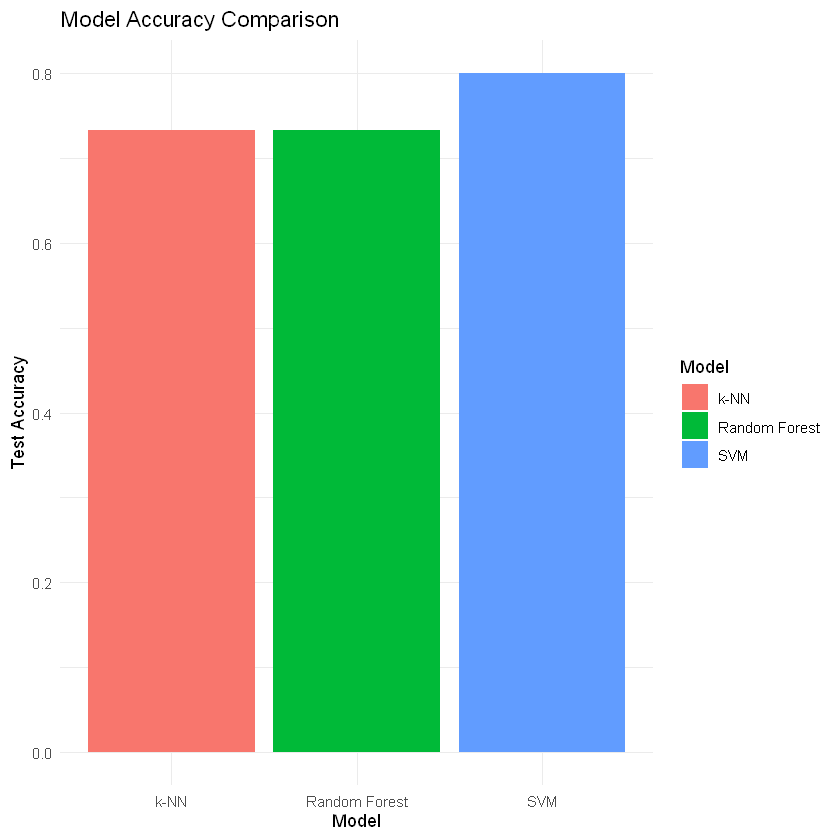

In [4]:
# Make predictions on the test set
y_pred_test_rf <- predict(rf_model, newdata = X_test_class)
y_pred_test_knn <- predict(knn_model, newdata = X_test_class)
y_pred_test_svm <- predict(svm_model, newdata = X_test_class)

# Calculate test accuracy
test_accuracy_rf <- sum(y_pred_test_rf == y_test_class) /
length(y_test_class)
test_accuracy_knn <- sum(y_pred_test_knn == y_test_class) /
length(y_test_class)
test_accuracy_svm <- sum(y_pred_test_svm == y_test_class) /
length(y_test_class)

# Create a data frame to hold the model metrics
model_metrics <- data.frame(
Model = c("Random Forest", "k-NN", "SVM"),
Test_Accuracy = c(test_accuracy_rf, test_accuracy_knn,
test_accuracy_svm))

# Create ggplot bar plot for model accuracy
accuracy_plot <- ggplot(model_metrics, aes(x = Model, y =
Test_Accuracy, fill = Model)) +
geom_bar(stat = 'identity') +
labs(title = "Model Accuracy Comparison",
x = "Model",
y = "Test Accuracy") +
theme_minimal()

# Display the plot
display("### Step 4: Visualization and Comparison")
display(accuracy_plot)

# Confusion Matrix
conf_matrix_rf <- confusionMatrix(y_pred_test_rf, y_test_class)
conf_matrix_knn <- confusionMatrix(y_pred_test_knn, y_test_class)
conf_matrix_svm <- confusionMatrix(y_pred_test_svm, y_test_class)

# Display Confusion Matrix
display(paste("### ", student_id, " - ", todays_date))
display("### Confusion Matrix for Random Forest")
print(as.matrix(conf_matrix_rf))
display("### Confusion Matrix for K-NN")
print(as.matrix(conf_matrix_knn))
display("### Confusion Matrix for SVM")
print(as.matrix(conf_matrix_svm))

[1] "### Step 5: Compare Predictions Against Existing Data"

[1] "###  Trejor6927  -  02/10/2026"

[1] "Correct predictions for Random Forest:  148"

[1] "Correct predictions for k-NN:  121"

[1] "Correct predictions for SVM:  132"

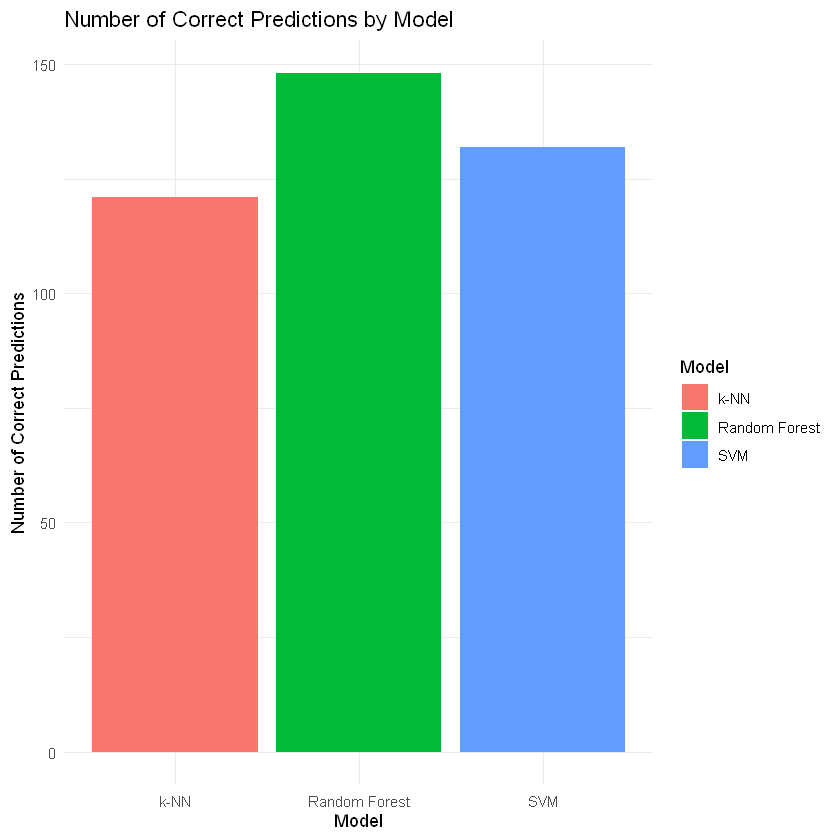

In [5]:
# Make predictions on the entire dataset
y_pred_all_rf <- predict(rf_model, newdata = X_class)
y_pred_all_knn <- predict(knn_model, newdata = X_class)
y_pred_all_svm <- predict(svm_model, newdata = X_class)

# Add these predictions to the original data frame
df$Predicted_RF <- y_pred_all_rf
df$Predicted_kNN <- y_pred_all_knn
df$Predicted_SVM <- y_pred_all_svm

# Count the number of correct and incorrect predictions for each model
correct_rf <- sum(df$Score_category == df$Predicted_RF)
correct_knn <- sum(df$Score_category == df$Predicted_kNN)
correct_svm <- sum(df$Score_category == df$Predicted_SVM)

# Create a data frame to hold the number of correct predictions for each model
correct_predictions_df <- data.frame(
Model = c("Random Forest", "k-NN", "SVM"),
Correct_Predictions = c(correct_rf, correct_knn, correct_svm))

# Create ggplot bar plot for the number of correct predictions
correct_predictions_plot <- ggplot(correct_predictions_df, aes(x =
Model, y = Correct_Predictions, fill = Model)) +
geom_bar(stat = 'identity') +
labs(title = "Number of Correct Predictions by Model",
x = "Model",
y = "Number of Correct Predictions") +
theme_minimal()

# Display counts and the bar plot
display("### Step 5: Compare Predictions Against Existing Data")
display(paste("### ", student_id, " - ", todays_date))
display(paste("Correct predictions for Random Forest: ", correct_rf))
display(paste("Correct predictions for k-NN: ", correct_knn))
display(paste("Correct predictions for SVM: ", correct_svm))
display(correct_predictions_plot)